In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('train.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df.isna().sum()

In [3]:
df.dropna(inplace=True)

In [109]:
df.shape , len(df.artists.unique())

((113999, 20), 31437)

# Dia 01

### Transformar variáveis booleanas em “Yes” e “No”

In [4]:
df['explicit'] = df['explicit'].replace({True: 'Yes', False: 'No'})

### Transformar as escalas das variáveis de 0 a 1 para 0 a 100

In [5]:
data = [
    'danceability',
    'energy',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence'
]

In [6]:
# só multiplicar por 100
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(df[data])
df[data] = scaler.transform(df[data])

### Transformar a variável track_genre em que a primeira letra fique maiúscula

In [7]:
df.track_genre = df.track_genre.str.capitalize()

### Criar a coluna album_extra extraindo os caracteres dentro do parênteses da variável album_name

In [8]:
df[['album_name', 'album_extra']] = df['album_name'].str.split('(', n=1, expand=True)
df['album_extra'] = df['album_extra'].str.split(')', n=0, expand=True)[0]

### Criar a coluna duration_s transformando a variável duration_ms para segundos

In [9]:
df['duration_s'] = df.duration_ms / 1000

### Criar a coluna duration_m transformando a variável duration_ms para minutos

In [10]:
df['duration_m'] = df.duration_ms / 60000

### Criar a coluna number_of_artists com o número de artistas em cada música

In [11]:
df['number_of_artists'] = (df['artists'].str.count(';') + 1).astype(int)

### Criar a coluna is_remix a partir da identificação da palavra Remix no nome da música

In [12]:
df['is_remix'] = df['track_name'].str.count('remix')

In [13]:
df['is_remix'] = df['is_remix'].replace({
    0: 'No',
    1: 'Yes'
})

### Criar a coluna is_remastered a partir da identificação da palavra Remastered no nome da música

In [14]:
df['is_remastered'] = df['track_name'].str.count('remastered')

In [15]:
df['is_remastered'] = df['is_remastered'].replace({
    0: 'No',
    1: 'Yes'
})

### salvar nova base

In [16]:
df.to_csv('spotify.csv', index=False)

# Dia 2

In [19]:
df = pd.read_csv('spotify.csv')

In [174]:
df[df.popularity == 100]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,valence,tempo,time_signature,track_genre,album_extra,duration_s,duration_m,number_of_artists,is_remix,is_remastered
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy,Unholy (feat. Kim Petras),100,156943,No,72.48731,47.2,2,...,23.919598,131.121,4,Dance,feat. Kim Petras,156.943,2.615717,2,No,No
81050,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy,Unholy (feat. Kim Petras),100,156943,No,72.48731,47.2,2,...,23.919598,131.121,4,Pop,feat. Kim Petras,156.943,2.615717,2,No,No


### Identificar os artistas mais populares

### artistas com a média maior
(aqui alguns artistas possuem apenas uma música)

In [230]:
df.groupby('artists').popularity.count().sort_values()

artists
Sidhu Moose Wala;The Kidd      1
India Martinez;Melendi         1
Ronnie Lovejoy                 1
Indian Ocean;Karsh Kale        1
Ronnie Hawkins                 1
                            ... 
Ella Fitzgerald              222
Linkin Park                  224
Stevie Wonder                236
George Jones                 271
The Beatles                  279
Name: popularity, Length: 31437, dtype: int64

In [233]:
df_populares = df.groupby('artists').popularity.mean().sort_values(ascending=False).head(10).reset_index()
df_populares

,artists,popularity
0,Sam Smith;Kim Petras,100.0
1,Bizarrap;Quevedo,99.0
2,Manuel Turizo,98.0
3,Bad Bunny;Chencho Corleone,97.0
4,Bad Bunny;Bomba Estéreo,94.5
5,Joji,94.0
6,Beyoncé,93.0
7,Harry Styles,92.0
8,Rema;Selena Gomez,92.0
9,Rauw Alejandro;Lyanno;Brray,91.0


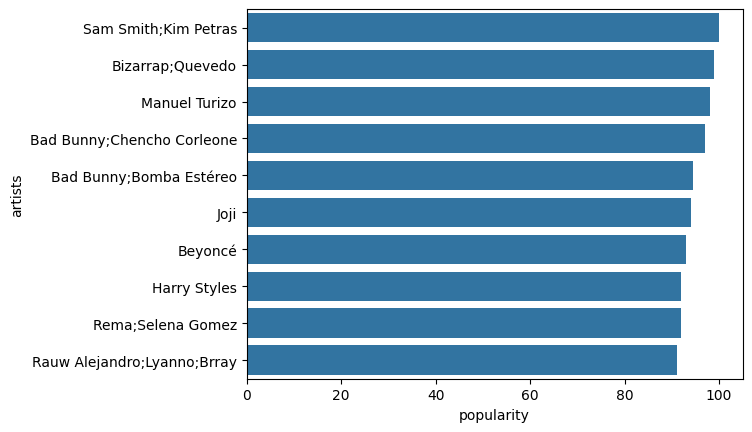

In [234]:
sns.barplot(data=df_populares, x='popularity', y='artists');

### Analisar a distribuição de número de artistas por música

artistas podem ter músicas com o mesmo nome mas com letras e melodias diferentes
        ex: Alone

In [242]:
# uma música do mesmo artista pode estar em muitas playlists diferentes
df[df['track_name'] == 'Frosty The Snowman']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,valence,tempo,time_signature,track_genre,album_extra,duration_s,duration_m,number_of_artists,is_remix,is_remastered
8023,72E3wMPI5tVY7VoEWLSuhf,Ella Fitzgerald,CHRISTMAS TOP HITS 2022,Frosty The Snowman,0,131733,No,58.781726,50.2,8,...,84.020101,76.783,4,Blues,NaN,131.733,2.195550,1,No,No
8024,7vvQrcQCfq7SB8mxO9CRHq,Ella Fitzgerald,Rockin' Around The Christmas Tree 2022,Frosty The Snowman,0,131733,No,58.781726,50.2,8,...,84.020101,76.783,4,Blues,NaN,131.733,2.195550,1,No,No
8034,6UPkgLF8SfiVmVGy5RYvIc,Ella Fitzgerald,World's Best Christmas Playlist,Frosty The Snowman,0,131733,No,58.781726,50.2,8,...,84.020101,76.783,4,Blues,NaN,131.733,2.195550,1,No,No
8036,1LFJLpGF7gexCurvUsjqG9,Ella Fitzgerald,Santa Claus Is Coming To Town,Frosty The Snowman,0,131733,No,58.781726,50.2,8,...,84.020101,76.783,4,Blues,NaN,131.733,2.195550,1,No,No
8050,0edRP0RpOUrjHbbGPSYzaH,Ella Fitzgerald,Christmas Songs 2022,Frosty The Snowman,4,131733,No,58.781726,50.2,8,...,84.020101,76.783,4,Blues,NaN,131.733,2.195550,1,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103378,7zEvaoS81Ta2d3D5p7zTgX,The Jackson 5,Xmas Classics 2022,Frosty The Snowman,0,159413,No,68.223350,61.5,0,...,94.874372,119.693,4,Soul,NaN,159.413,2.656883,1,No,No
103383,7tgZA5AwbrKa9o5SLOgi1D,The Jackson 5,A Very 70s Christmas,Frosty The Snowman,0,159413,No,68.223350,61.5,0,...,94.874372,119.693,4,Soul,NaN,159.413,2.656883,1,No,No
103397,6u9PfqfVWCglvZ6mN4Y5SJ,The Jackson 5,Soulful Christmas,Frosty The Snowman,0,159413,No,68.223350,61.5,0,...,94.874372,119.693,4,Soul,NaN,159.413,2.656883,1,No,No
103398,1MrOVIoFNsJKY01ul5WMxT,The Jackson 5,Christmas Soul Classics,Frosty The Snowman,0,159413,No,68.223350,61.5,0,...,94.874372,119.693,4,Soul,NaN,159.413,2.656883,1,No,No


In [196]:
df_artistas_musica = df[['track_name', 'artists']].drop_duplicates(keep='first')

In [200]:
df_artistas_musica[df_artistas_musica['track_name'] == 'Frosty The Snowman']

,track_name,artists
8023,Frosty The Snowman,Ella Fitzgerald
66043,Frosty The Snowman,Cooltime Kids
103325,Frosty The Snowman,The Jackson 5


as musicas que mais foram gravadas por artistas são natalinas como, Run Rudolph Run, Frosty The Snowman e Christmas Time

In [198]:
df_am = df_artistas_musica.groupby('track_name').artists.count().sort_values(ascending=False)
df_am.head(10)

track_name
Home           24
Paradise       22
Alone          21
Without You    18
Intro          18
Heaven         17
Stay           16
You            16
Hold On        16
Monster        16
Name: artists, dtype: int64

### Analisar a relação entre as variáveis energy e loudness 

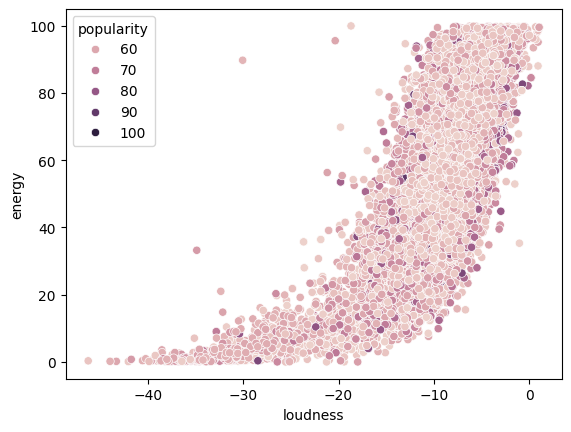

In [257]:
sns.scatterplot(data=df[df['popularity'] > 50], x='loudness', y='energy', hue='popularity');

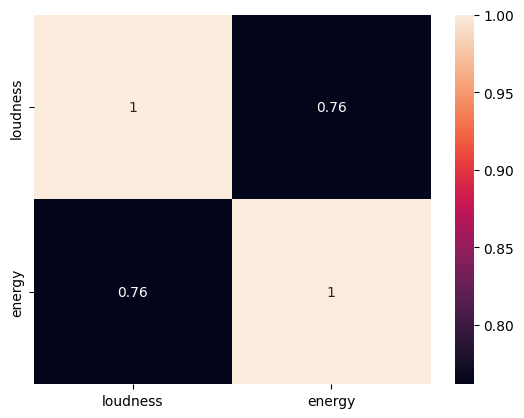

In [18]:

sns.heatmap(df[['loudness', 'energy']].corr(method='pearson', numeric_only=True), annot=True);

### Analisar a relação entre as variáveis time_signature e track_genre

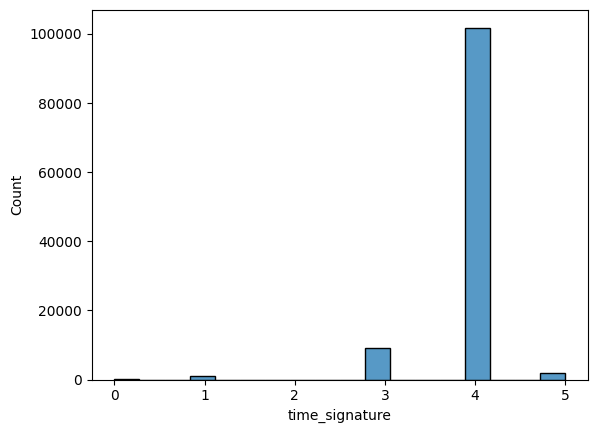

In [20]:
sns.histplot(data=df, x='time_signature');

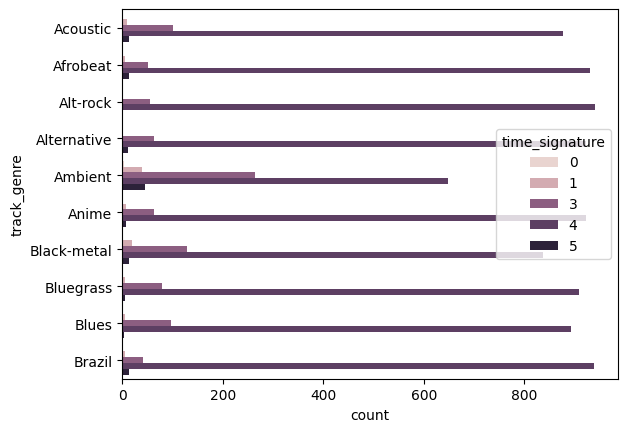

In [298]:
sns.countplot(data=df.iloc[:10000, :], y='track_genre', hue='time_signature');

In [312]:
df.groupby(['time_signature', 'track_genre']).track_genre.count()

time_signature  track_genre
0               Alt-rock        1
                Ambient         3
                Disney          1
                Guitar          4
                Iranian         4
                               ..
5               Techno          2
                Trance          9
                Trip-hop        4
                Turkish        12
                World-music    14
Name: track_genre, Length: 459, dtype: int64

In [270]:
df['time_signature'].value_counts()

time_signature
4    101842
3      9195
5      1826
1       973
0       163
Name: count, dtype: int64

### Criar uma versão agrupada do dataset por track_genre

In [ ]:
df_agrupado = df.groupby(['track_genre', 'time_signature']).popularity.mean().reset_index()
df_agrupado

In [335]:
df_agrupado.to_csv('versao_agrupada.csv', index=False)

### Analisar a relação entre a duração (em minutos) e a popularidade da música

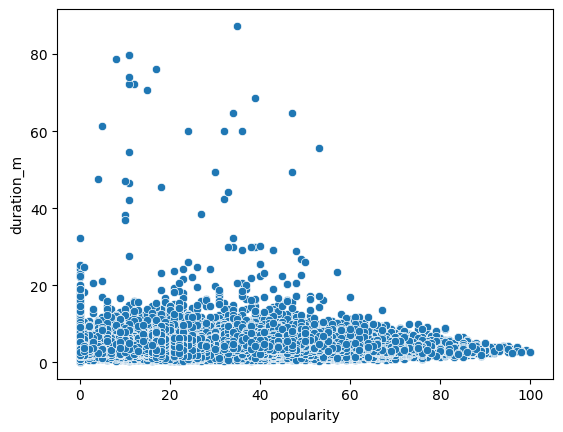

In [22]:
sns.scatterplot(data=df, y='duration_m', x='popularity');

In [29]:
# as musicas mais populares possuem uma duração entre 3 e 4 minutos
round(df[df['popularity'] > 90].duration_m).value_counts()

duration_m
4.0    32
3.0    31
2.0     5
Name: count, dtype: int64

In [ ]:
bins = [0, 25, 50, 75, 100]
labels = [25, 50, 75, 100]

df['bins_popularity'] = pd.cut(df['popularity'], bins=bins, labels=labels)

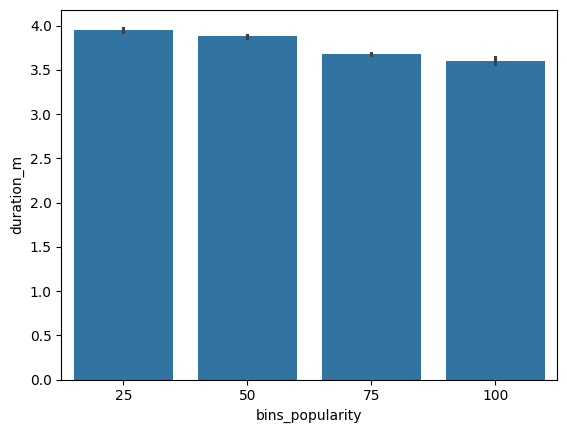

In [36]:
sns.barplot(data=df, y='duration_m', x='bins_popularity');

In [30]:
df[['duration_m', 'popularity']].corr()

,duration_m,popularity
duration_m,1.000000,-0.007129
popularity,-0.007129,1.000000


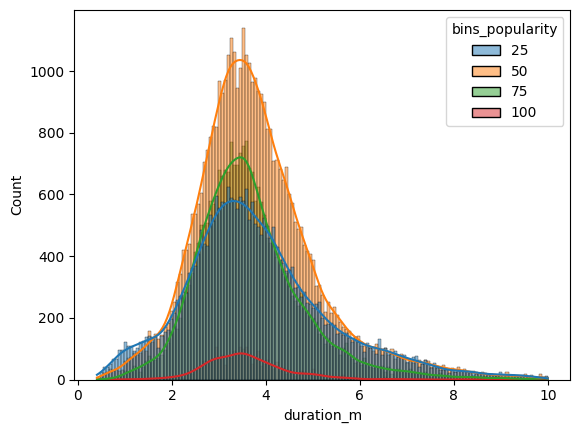

In [31]:
sns.histplot(data=df[df.duration_m < 10], 
             x='duration_m', 
             hue='bins_popularity', 
             kde=True);